In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# globally available variables and their meanings
#                df - all raw CSV data
#          df_train - raw training data (80% of df)
#     df_train_feat - raw training features
#   df_train_labels - raw training labels
#           df_test - raw testing data (20% of df)
# df_train_feat_prepared - prepared training feature data

In [2]:
import zipfile
import io

# Get the data.
# Convert the data to a format you can easily manipulate (without changing the data itself).
# Ensure sensitive information is deleted or protected (e.g., anonymized).
# Data available at https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009
def load_data() -> pd.DataFrame:
    with zipfile.ZipFile('./red-wine-quality-cortez-et-al-2009.zip', 'r') as zip_ref:
        csv = zip_ref.read('winequality-red.csv')
        return pd.read_csv(io.BytesIO(csv))

df = load_data()
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


| feature | significance |
|:--|:--|
| fixed acidity | most acids involved with wine or fixed or nonvolatile (do not evaporate readily) |
| volatile acidity | the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste |
| citric acid | found in small quantities, citric acid can add 'freshness' and flavor to wines |
| residual sugar | the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet |
| chlorides | the amount of salt in the wine |
| free sulfur dioxide | the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine |
| total sulfur dioxide | amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine |
| density | the density of water is close to that of water depending on the percent alcohol and sugar content |
| pH | describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale |
| sulfates | a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant |
| alcohol | the percent alcohol content of the wine |
| quality | output variable (based on sensory data, score between 0 and 10) |

In [3]:
# Check the size and type of data (time series, sample, geographical, etc.).
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


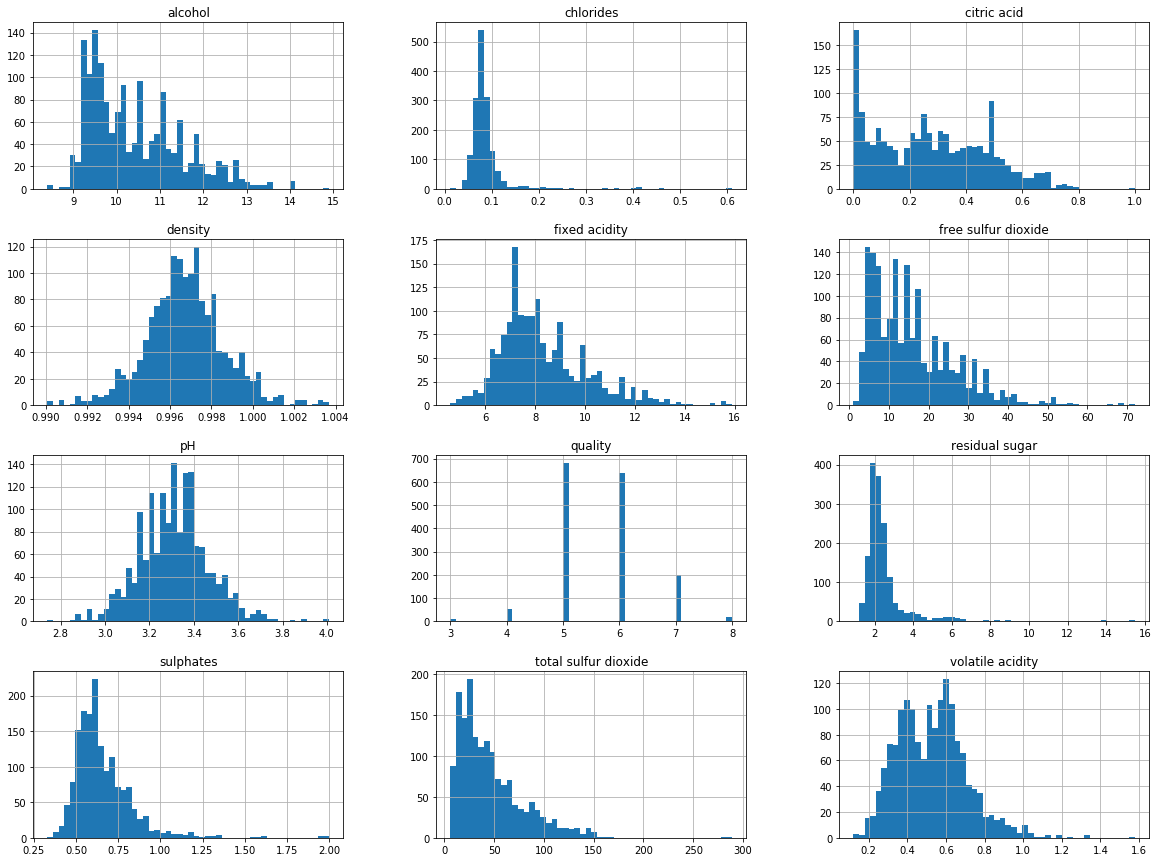

In [5]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

In [6]:
# Sample a test set, put it aside
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_index, test_index in sss.split(df, df['quality']):
    df_train, df_test = df.iloc[train_index], df.iloc[test_index]

# Check stratification
df_vc = df.quality.value_counts() / len(df)
df_train_vc = df_train.quality.value_counts() / len(df_train)
diff = np.abs(df_vc - df_train_vc)
pd.concat([df_vc, df_train_vc, diff], axis=1, keys=['all', 'training', 'abs diff'])

,all,training,abs diff
5,0.425891,0.426114,2.229697e-04
6,0.398999,0.398749,2.503519e-04
7,0.124453,0.124316,1.369112e-04
4,0.033146,0.032838,3.075613e-04
8,0.011257,0.011728,4.708768e-04
3,0.006254,0.006255,9.779372e-07


In [7]:
# % of missing values
for column in df_train.columns:
    num_na_rows = len(df[pd.isna(df[column])])
    pc_missing = num_na_rows / len(df)
    print('%s %2d%%' %(column, pc_missing))

fixed acidity  0%
volatile acidity  0%
citric acid  0%
residual sugar  0%
chlorides  0%
free sulfur dioxide  0%
total sulfur dioxide  0%
density  0%
pH  0%
sulphates  0%
alcohol  0%
quality  0%


In [8]:
# another way of checking missing values
sample_incomplete_rows = df_train[df_train.isnull().any(axis=1)]
print('Number of incomplete rows: %s' % len(sample_incomplete_rows))

Number of incomplete rows: 0


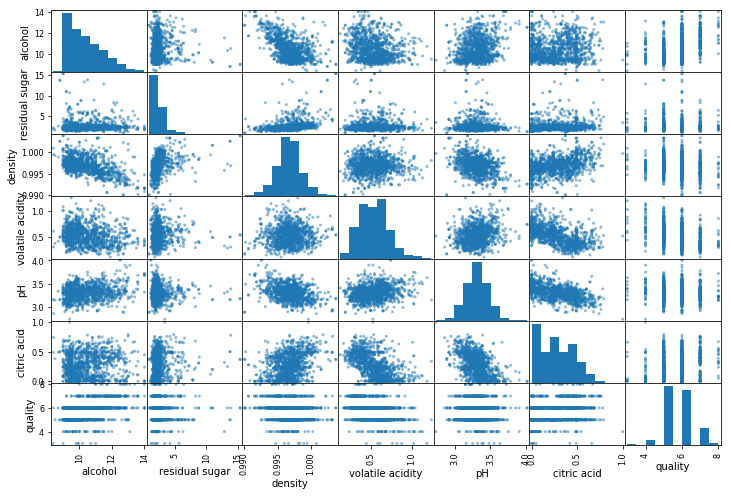

In [9]:
attrs = ['alcohol', 'residual sugar', 'density', 'volatile acidity', 'pH', 'citric acid', 'quality']
pd.plotting.scatter_matrix(df_train[attrs], figsize=(12, 8))
plt.show()

In [10]:
# Study the correlations between attributes.
# It appears alcohol positively correlates with quality, while volatile acidity negatively correlates with quality
df_train.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.479020
sulphates               0.249432
citric acid             0.215643
fixed acidity           0.113460
residual sugar          0.009966
pH                     -0.035356
free sulfur dioxide    -0.053338
chlorides              -0.142344
density                -0.175559
total sulfur dioxide   -0.197734
volatile acidity       -0.385828
Name: quality, dtype: float64

In [11]:
# prepare data for machine learning algorithms by separating labels from data
df_train_feat = df_train.drop(columns=['quality'])
df_train_labels = df_train['quality'].copy()

df_train_feat.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
188,7.9,0.50,0.33,2.0,0.084,15.0,143.0,0.99680,3.20,0.55,9.5
1313,7.0,0.36,0.21,2.3,0.086,20.0,65.0,0.99558,3.40,0.54,10.1
190,8.2,0.50,0.35,2.9,0.077,21.0,127.0,0.99760,3.23,0.62,9.4
1195,6.2,0.43,0.22,1.8,0.078,21.0,56.0,0.99633,3.52,0.60,9.5
741,9.2,0.53,0.24,2.6,0.078,28.0,139.0,0.99788,3.21,0.57,9.5


In [12]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

df_train_feat_prepared = pipeline.fit_transform(df_train_feat)
df_train_feat_prepared.shape

(1279, 11)

In [13]:
# quick n' dirty linear regression
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(df_train_feat_prepared, df_train_labels)

/Users/henryehly/src/red-wine-quality/venv/lib/python3.7/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
some_feat = df.drop(columns=['quality']).iloc[:5]
some_labels = df.iloc[:5]['quality']
some_feat_prepared = pipeline.fit_transform(some_feat)
print('Predicted:\t', lin_reg.predict(some_feat_prepared))
print('Actual:\t\t', list(some_labels))

Predicted:	 [5.11656423 5.88579084 5.8828668  6.18429678 5.11656423]
Actual:		 [5, 5, 5, 6, 5]


In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

df_train_predict = lin_reg.predict(df_train_feat_prepared)
lin_mse = mean_squared_error(df_train_labels, df_train_predict)
lin_rmse = np.sqrt(lin_mse)
print('mean squared error', lin_rmse)

lin_mae = mean_absolute_error(df_train_labels, df_train_predict)
print('mean absolute error', lin_mae)
lin_reg

mean squared error 0.6465158981791657
mean absolute error 0.49933552335982295


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
# quick n' dirty decision tree
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(df_train_feat_prepared, df_train_labels)
df_train_predict = tree_reg.predict(df_train_feat_prepared)
tree_mse = mean_squared_error(df_train_labels, df_train_predict)
tree_rmse = np.sqrt(tree_mse)
print('mean squared error', tree_rmse)

tree_mae = mean_absolute_error(df_train_labels, df_train_predict)
print('mean absolute error', tree_mae)
tree_reg

mean squared error 0.0
mean absolute error 0.0


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [17]:
# quick n' dirty random forest
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(df_train_feat_prepared, df_train_labels)
df_train_predict = forest_reg.predict(df_train_feat_prepared)
forest_mse = mean_squared_error(y_pred=df_train_predict, y_true=df_train_labels)
forest_rmse = np.sqrt(forest_mse)
print('mean squared error', forest_rmse)

forest_mae = mean_absolute_error(y_pred=df_train_predict, y_true=df_train_labels)
print('mean absolute error', forest_mae)
forest_reg

mean squared error 0.2696390892796383
mean absolute error 0.17240031274433143


/Users/henryehly/src/red-wine-quality/venv/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [18]:
# quick n' dirty SVM
from sklearn.svm import SVR

svm_reg = SVR(kernel='linear')
svm_reg.fit(df_train_feat_prepared, df_train_labels)
df_train_predict = svm_reg.predict(df_train_feat_prepared)
svm_mse = mean_squared_error(y_pred=df_train_predict, y_true=df_train_labels)
svm_rmse = np.sqrt(svm_mse)
print('mean squared error', svm_rmse)

svm_mae = mean_absolute_error(df_train_labels, df_train_predict)
print('mean absolute error', svm_mae)
svm_reg

mean squared error 0.6504639988604975
mean absolute error 0.4937711508578809


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [19]:
def display_scores(scores):
    print('Scores', scores)
    print('Mean', scores.mean())
    print('Standard Deviation', scores.std())

In [20]:
from sklearn.model_selection import cross_val_score

lin_reg_scores = cross_val_score(lin_reg, df_train_feat_prepared, df_train_labels,
                        scoring='neg_mean_squared_error', cv=10, n_jobs=4)
lin_rmse_scores = np.sqrt(-lin_reg_scores)

display_scores(lin_rmse_scores)

Scores [0.71674452 0.64352948 0.57370325 0.66531059 0.65781663 0.62680028
 0.68508969 0.71585982 0.57682289 0.66030629]
Mean 0.6521983428114165
Standard Deviation 0.047045954423046495


In [21]:
tree_reg_scores = cross_val_score(tree_reg, df_train_feat_prepared, df_train_labels,
                                  scoring='neg_mean_squared_error', cv=10, n_jobs=4)
tree_rmse_scores = np.sqrt(-tree_reg_scores)

display_scores(tree_rmse_scores)

Scores [0.80039053 0.75       0.75519037 0.83852549 0.84779125 0.78062475
 0.75519037 0.875      0.93958102 0.89178226]
Mean 0.8234076044402008
Standard Deviation 0.06221917714955813


In [22]:
forest_reg_scores = cross_val_score(forest_reg, df_train_feat_prepared, df_train_labels,
                                  scoring='neg_mean_squared_error', cv=10, n_jobs=4)
forest_rmse_scores = np.sqrt(-forest_reg_scores)
display_scores(forest_reg_scores)
# Question: Why are the scores / mean negative?

Scores [-0.44992188 -0.370625   -0.38804687 -0.37984375 -0.47914062 -0.36945312
 -0.34820313 -0.42039062 -0.3103125  -0.41015748]
Mean -0.39260949803149603
Standard Deviation 0.046690584333771684


In [23]:
svm_reg_scores = cross_val_score(svm_reg, df_train_feat_prepared, df_train_labels,
                                 scoring='neg_mean_squared_error', cv=10, n_jobs=4)
svm_rmse_scores = np.sqrt(-svm_reg_scores)
display_scores(svm_rmse_scores)

Scores [0.71773047 0.64947221 0.59322131 0.66440001 0.66423467 0.62624056
 0.67632074 0.72294551 0.57706194 0.66130602]
Mean 0.6552933454438309
Standard Deviation 0.04468493416830559


In [25]:
# It looks like the most promising models are Linear Regression, SVM and Random Forest
# Let do grid search cross validation with SVM to find best hyperparameter combination
from sklearn.model_selection import GridSearchCV

svm_param_grid = [
    {
        'C': [1., 3., 10., 30., 100., 300., 1000., 3000.], 
        'kernel': ['linear']
    },
    {
        'C': [1., 3., 10., 30., 100., 300., 1000., 3000.], 
        'kernel': ['rbf'], 
        'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]
    }
]

svm_reg = SVR()
svm_grid_search = GridSearchCV(svm_reg, svm_param_grid, scoring='neg_mean_squared_error', n_jobs=4, cv=5, verbose=2)
svm_grid_search.fit(df_train_feat_prepared, df_train_labels)

Fitting 5 folds for each of 56 candidates, totalling 280 fits
[CV] C=1.0, kernel=linear ............................................
[CV] C=1.0, kernel=linear ............................................
[CV] C=1.0, kernel=linear ............................................
[CV] C=1.0, kernel=linear ............................................
[CV] ............................. C=1.0, kernel=linear, total=   0.1s
[CV] C=1.0, kernel=linear ............................................
[CV] ............................. C=1.0, kernel=linear, total=   0.2s
[CV] ............................. C=1.0, kernel=linear, total=   0.2s
[CV] C=3.0, kernel=linear ............................................
[CV] C=3.0, kernel=linear ............................................
[CV] ............................. C=1.0, kernel=linear, total=   0.2s
[CV] C=3.0, kernel=linear ............................................
[CV] ............................. C=1.0, kernel=linear, total=   0.1s
[CV] C=3.0, ker

[Parallel(n_jobs=4)]: Done  45 tasks      | elapsed:  4.7min


[CV] .................... C=1.0, gamma=0.03, kernel=rbf, total=   0.1s
[CV] C=1.0, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=1.0, gamma=0.1, kernel=rbf, total=   0.1s
[CV] C=1.0, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=1.0, gamma=0.1, kernel=rbf, total=   0.1s
[CV] C=1.0, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=1.0, gamma=0.1, kernel=rbf, total=   0.1s
[CV] C=1.0, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=1.0, gamma=0.1, kernel=rbf, total=   0.1s
[CV] C=1.0, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=1.0, gamma=0.1, kernel=rbf, total=   0.1s
[CV] C=1.0, gamma=0.3, kernel=rbf ....................................
[CV] ..................... C=1.0, gamma=0.3, kernel=rbf, total=   0.1s
[CV] C=1.0, gamma=0.3, kernel=rbf ....................................
[CV] .

[CV] ................... C=10.0, gamma=0.03, kernel=rbf, total=   0.2s
[CV] C=10.0, gamma=0.03, kernel=rbf ..................................
[CV] ................... C=10.0, gamma=0.03, kernel=rbf, total=   0.1s
[CV] C=10.0, gamma=0.03, kernel=rbf ..................................
[CV] ................... C=10.0, gamma=0.03, kernel=rbf, total=   0.1s
[CV] C=10.0, gamma=0.1, kernel=rbf ...................................
[CV] .................... C=10.0, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=10.0, gamma=0.1, kernel=rbf ...................................
[CV] .................... C=10.0, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=10.0, gamma=0.1, kernel=rbf ...................................
[CV] .................... C=10.0, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=10.0, gamma=0.1, kernel=rbf ...................................
[CV] .................... C=10.0, gamma=0.1, kernel=rbf, total=   0.2s
[CV] C=10.0, gamma=0.1, kernel=rbf ...................................
[CV] .

[CV] .................. C=100.0, gamma=0.03, kernel=rbf, total=   0.6s
[CV] C=100.0, gamma=0.03, kernel=rbf .................................
[CV] .................. C=100.0, gamma=0.03, kernel=rbf, total=   0.6s
[CV] C=100.0, gamma=0.03, kernel=rbf .................................
[CV] .................. C=100.0, gamma=0.03, kernel=rbf, total=   0.6s
[CV] C=100.0, gamma=0.03, kernel=rbf .................................
[CV] .......................... C=3000.0, kernel=linear, total= 3.3min
[CV] C=100.0, gamma=0.03, kernel=rbf .................................
[CV] .................. C=100.0, gamma=0.03, kernel=rbf, total=   0.6s
[CV] C=100.0, gamma=0.1, kernel=rbf ..................................


[Parallel(n_jobs=4)]: Done 166 tasks      | elapsed:  5.2min


[CV] .................. C=100.0, gamma=0.03, kernel=rbf, total=   0.6s
[CV] C=100.0, gamma=0.1, kernel=rbf ..................................
[CV] ................... C=100.0, gamma=0.1, kernel=rbf, total=   1.0s
[CV] C=100.0, gamma=0.1, kernel=rbf ..................................
[CV] ................... C=100.0, gamma=0.1, kernel=rbf, total=   0.9s
[CV] C=100.0, gamma=0.1, kernel=rbf ..................................
[CV] ................... C=100.0, gamma=0.1, kernel=rbf, total=   1.1s
[CV] C=100.0, gamma=0.1, kernel=rbf ..................................
[CV] ................... C=100.0, gamma=0.1, kernel=rbf, total=   1.1s
[CV] C=100.0, gamma=0.3, kernel=rbf ..................................
[CV] ................... C=100.0, gamma=0.3, kernel=rbf, total=   0.3s
[CV] C=100.0, gamma=0.3, kernel=rbf ..................................
[CV] ................... C=100.0, gamma=0.1, kernel=rbf, total=   0.9s
[CV] C=100.0, gamma=0.3, kernel=rbf ..................................
[CV] .

[CV] ................. C=1000.0, gamma=0.03, kernel=rbf, total=   5.0s
[CV] C=1000.0, gamma=0.03, kernel=rbf ................................
[CV] ................. C=1000.0, gamma=0.03, kernel=rbf, total=   6.1s
[CV] C=1000.0, gamma=0.1, kernel=rbf .................................
[CV] ................. C=1000.0, gamma=0.03, kernel=rbf, total=   6.2s
[CV] C=1000.0, gamma=0.1, kernel=rbf .................................
[CV] ................. C=1000.0, gamma=0.03, kernel=rbf, total=   5.9s
[CV] C=1000.0, gamma=0.1, kernel=rbf .................................
[CV] .................. C=1000.0, gamma=0.1, kernel=rbf, total=   3.6s
[CV] C=1000.0, gamma=0.1, kernel=rbf .................................
[CV] .................. C=1000.0, gamma=0.1, kernel=rbf, total=   4.2s
[CV] C=1000.0, gamma=0.1, kernel=rbf .................................
[CV] .................. C=1000.0, gamma=0.1, kernel=rbf, total=   4.0s
[CV] C=1000.0, gamma=0.3, kernel=rbf .................................
[CV] .

[Parallel(n_jobs=4)]: Done 280 out of 280 | elapsed:  7.3min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=4,
       param_grid=[{'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0], 'kernel': ['linear']}, {'C': [1.0, 3.0, 10.0, 30.0, 100.0, 300.0, 1000.0, 3000.0], 'kernel': ['rbf'], 'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=2)

In [27]:
svm_grid_search.best_params_  # {'C': 1.0, 'gamma': 0.1, 'kernel': 'rbf'}

{'C': 1.0, 'gamma': 0.1, 'kernel': 'rbf'}

In [44]:
svm_cv_results = svm_grid_search.cv_results_
svm_sorted_scores = []
for mean_score, params in zip(svm_cv_results['mean_test_score'], svm_cv_results['params']):
    svm_sorted_scores.append([np.sqrt(-mean_score), params])
sorted(svm_sorted_scores, key=lambda s: s[0])

[[0.6203880736953563, {'C': 1.0, 'gamma': 0.1, 'kernel': 'rbf'}],
 [0.6260673618383911, {'C': 3.0, 'gamma': 0.1, 'kernel': 'rbf'}],
 [0.6297185540962843, {'C': 10.0, 'gamma': 0.03, 'kernel': 'rbf'}],
 [0.6302554982645495, {'C': 1.0, 'gamma': 0.3, 'kernel': 'rbf'}],
 [0.6327409862531966, {'C': 3.0, 'gamma': 0.03, 'kernel': 'rbf'}],
 [0.636785047407014, {'C': 1.0, 'gamma': 0.03, 'kernel': 'rbf'}],
 [0.6401212438440913, {'C': 30.0, 'gamma': 0.03, 'kernel': 'rbf'}],
 [0.6448962834024624, {'C': 3.0, 'gamma': 0.01, 'kernel': 'rbf'}],
 [0.6458246562658796, {'C': 1.0, 'gamma': 0.01, 'kernel': 'rbf'}],
 [0.6477982644220809, {'C': 10.0, 'gamma': 0.01, 'kernel': 'rbf'}],
 [0.6480506140048474, {'C': 30.0, 'gamma': 0.01, 'kernel': 'rbf'}],
 [0.652021903344748, {'C': 100.0, 'gamma': 0.01, 'kernel': 'rbf'}],
 [0.6545470808690124, {'C': 3.0, 'gamma': 0.3, 'kernel': 'rbf'}],
 [0.6573298946534322, {'C': 10.0, 'gamma': 0.1, 'kernel': 'rbf'}],
 [0.6587184284507354, {'C': 1.0, 'kernel': 'linear'}],
 [0.658

In [53]:
# Randomized Search cross validation with RandomForestRegressor model
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distributions = {
    'n_estimators': randint(1, 300),
    'max_features': randint(1, 8)
}

forest_reg = RandomForestRegressor()
forest_rnd_search = RandomizedSearchCV(forest_reg, param_distributions, cv=5, n_iter=100,
                                       scoring='neg_mean_squared_error', n_jobs=4, verbose=2)
forest_rnd_search.fit(df_train_feat_prepared, df_train_labels)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] max_features=4, n_estimators=269 ................................
[CV] max_features=4, n_estimators=269 ................................
[CV] max_features=4, n_estimators=269 ................................
[CV] max_features=4, n_estimators=269 ................................
[CV] ................. max_features=4, n_estimators=269, total=   0.7s
[CV] max_features=4, n_estimators=269 ................................
[CV] ................. max_features=4, n_estimators=269, total=   0.7s
[CV] max_features=2, n_estimators=291 ................................
[CV] ................. max_features=4, n_estimators=269, total=   0.7s
[CV] max_features=2, n_estimators=291 ................................
[CV] ................. max_features=4, n_estimators=269, total=   0.7s
[CV] max_features=2, n_estimators=291 ................................
[CV] ................. max_features=2, n_estimators=291, total=   0.6s
[CV] max_featu

[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    4.0s


[CV] ................. max_features=2, n_estimators=151, total=   0.4s
[CV] max_features=5, n_estimators=289 ................................
[CV] ................. max_features=5, n_estimators=289, total=   0.9s
[CV] max_features=5, n_estimators=289 ................................
[CV] ................. max_features=5, n_estimators=289, total=   0.9s
[CV] max_features=6, n_estimators=286 ................................
[CV] ................. max_features=5, n_estimators=289, total=   0.9s
[CV] max_features=6, n_estimators=286 ................................
[CV] ................. max_features=5, n_estimators=289, total=   0.9s
[CV] max_features=6, n_estimators=286 ................................
[CV] ................. max_features=5, n_estimators=289, total=   0.9s
[CV] max_features=6, n_estimators=286 ................................
[CV] ................. max_features=6, n_estimators=286, total=   1.0s
[CV] max_features=6, n_estimators=286 ................................
[CV] .

[CV] .................. max_features=1, n_estimators=44, total=   0.1s
[CV] max_features=6, n_estimators=222 ................................
[CV] .................. max_features=1, n_estimators=44, total=   0.1s
[CV] max_features=6, n_estimators=222 ................................
[CV] ................. max_features=7, n_estimators=176, total=   0.7s
[CV] max_features=6, n_estimators=222 ................................
[CV] ................. max_features=6, n_estimators=222, total=   0.8s
[CV] max_features=6, n_estimators=222 ................................
[CV] ................. max_features=6, n_estimators=222, total=   0.8s
[CV] max_features=3, n_estimators=24 .................................
[CV] ................. max_features=6, n_estimators=222, total=   0.8s
[CV] max_features=3, n_estimators=24 .................................
[CV] .................. max_features=3, n_estimators=24, total=   0.1s
[CV] max_features=3, n_estimators=24 .................................
[CV] .

[CV] ................. max_features=3, n_estimators=271, total=   0.7s
[CV] max_features=3, n_estimators=271 ................................
[CV] ................. max_features=3, n_estimators=271, total=   0.7s
[CV] max_features=2, n_estimators=296 ................................
[CV] ................. max_features=3, n_estimators=271, total=   0.7s
[CV] max_features=2, n_estimators=296 ................................
[CV] ................. max_features=3, n_estimators=271, total=   0.7s
[CV] max_features=2, n_estimators=296 ................................


[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   20.7s


[CV] ................. max_features=3, n_estimators=271, total=   0.7s
[CV] max_features=2, n_estimators=296 ................................
[CV] ................. max_features=2, n_estimators=296, total=   0.7s
[CV] max_features=2, n_estimators=296 ................................
[CV] ................. max_features=2, n_estimators=296, total=   0.7s
[CV] max_features=2, n_estimators=108 ................................
[CV] ................. max_features=2, n_estimators=296, total=   0.6s
[CV] max_features=2, n_estimators=108 ................................
[CV] ................. max_features=2, n_estimators=108, total=   0.2s
[CV] max_features=2, n_estimators=108 ................................
[CV] ................. max_features=2, n_estimators=108, total=   0.2s
[CV] max_features=2, n_estimators=108 ................................
[CV] ................. max_features=2, n_estimators=108, total=   0.2s
[CV] max_features=2, n_estimators=108 ................................
[CV] .

[CV] ................. max_features=3, n_estimators=285, total=   0.7s
[CV] max_features=3, n_estimators=175 ................................
[CV] ................. max_features=3, n_estimators=285, total=   0.7s
[CV] max_features=3, n_estimators=175 ................................
[CV] ................. max_features=3, n_estimators=175, total=   0.4s
[CV] max_features=3, n_estimators=175 ................................
[CV] ................. max_features=3, n_estimators=175, total=   0.4s
[CV] max_features=3, n_estimators=175 ................................
[CV] ................. max_features=3, n_estimators=175, total=   0.4s
[CV] max_features=4, n_estimators=119 ................................
[CV] ................. max_features=3, n_estimators=285, total=   0.7s
[CV] max_features=4, n_estimators=119 ................................
[CV] ................. max_features=4, n_estimators=119, total=   0.3s
[CV] max_features=4, n_estimators=119 ................................
[CV] .

[CV] ................. max_features=2, n_estimators=299, total=   0.8s
[CV] ................. max_features=2, n_estimators=299, total=   0.8s
[CV] max_features=2, n_estimators=299 ................................
[CV] max_features=7, n_estimators=87 .................................
[CV] ................. max_features=2, n_estimators=299, total=   0.7s
[CV] max_features=7, n_estimators=87 .................................
[CV] ................. max_features=2, n_estimators=299, total=   0.7s
[CV] max_features=7, n_estimators=87 .................................
[CV] .................. max_features=7, n_estimators=87, total=   0.4s
[CV] max_features=7, n_estimators=87 .................................
[CV] .................. max_features=7, n_estimators=87, total=   0.4s
[CV] max_features=7, n_estimators=87 .................................
[CV] .................. max_features=7, n_estimators=87, total=   0.4s
[CV] max_features=4, n_estimators=54 .................................
[CV] .

[CV] ................. max_features=2, n_estimators=144, total=   0.3s
[CV] max_features=3, n_estimators=233 ................................
[CV] ................. max_features=2, n_estimators=144, total=   0.4s
[CV] max_features=3, n_estimators=233 ................................
[CV] ................. max_features=3, n_estimators=233, total=   0.6s
[CV] max_features=3, n_estimators=233 ................................
[CV] ................. max_features=3, n_estimators=233, total=   0.6s
[CV] max_features=7, n_estimators=74 .................................
[CV] ................. max_features=3, n_estimators=233, total=   0.6s
[CV] max_features=7, n_estimators=74 .................................
[CV] ................. max_features=3, n_estimators=233, total=   0.6s
[CV] max_features=7, n_estimators=74 .................................
[CV] .................. max_features=7, n_estimators=74, total=   0.3s
[CV] max_features=7, n_estimators=74 .................................
[CV] .

[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:   46.0s


[CV] .................. max_features=3, n_estimators=30, total=   0.1s
[CV] max_features=3, n_estimators=30 .................................
[CV] .................. max_features=3, n_estimators=30, total=   0.1s
[CV] max_features=6, n_estimators=294 ................................
[CV] ................. max_features=2, n_estimators=283, total=   1.2s
[CV] max_features=6, n_estimators=294 ................................
[CV] .................. max_features=3, n_estimators=30, total=   0.1s
[CV] max_features=6, n_estimators=294 ................................
[CV] .................. max_features=3, n_estimators=30, total=   0.1s
[CV] max_features=6, n_estimators=294 ................................
[CV] ................. max_features=6, n_estimators=294, total=   1.1s
[CV] max_features=6, n_estimators=294 ................................
[CV] ................. max_features=6, n_estimators=294, total=   1.1s
[CV] max_features=6, n_estimators=56 .................................
[CV] .

[CV] .................. max_features=1, n_estimators=99, total=   0.2s
[CV] max_features=6, n_estimators=238 ................................
[CV] .................. max_features=1, n_estimators=99, total=   0.2s
[CV] max_features=6, n_estimators=238 ................................
[CV] ................. max_features=6, n_estimators=238, total=   0.9s
[CV] max_features=6, n_estimators=238 ................................
[CV] ................. max_features=6, n_estimators=238, total=   0.8s
[CV] max_features=6, n_estimators=97 .................................
[CV] ................. max_features=6, n_estimators=238, total=   0.8s
[CV] max_features=6, n_estimators=97 .................................
[CV] ................. max_features=6, n_estimators=238, total=   0.9s
[CV] max_features=6, n_estimators=97 .................................
[CV] .................. max_features=6, n_estimators=97, total=   0.4s
[CV] max_features=6, n_estimators=97 .................................
[CV] .

[CV] ................. max_features=6, n_estimators=234, total=   0.9s
[CV] max_features=7, n_estimators=93 .................................
[CV] ................. max_features=6, n_estimators=234, total=   0.9s
[CV] max_features=7, n_estimators=93 .................................
[CV] .................. max_features=7, n_estimators=93, total=   0.4s
[CV] max_features=7, n_estimators=93 .................................
[CV] ................. max_features=6, n_estimators=234, total=   0.9s
[CV] max_features=7, n_estimators=93 .................................
[CV] .................. max_features=7, n_estimators=93, total=   0.4s
[CV] max_features=7, n_estimators=93 .................................
[CV] .................. max_features=7, n_estimators=93, total=   0.4s
[CV] max_features=2, n_estimators=92 .................................
[CV] ................. max_features=6, n_estimators=234, total=   0.9s
[CV] max_features=2, n_estimators=92 .................................
[CV] .

[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:  1.0min finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=4,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x118d42588>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x118d42320>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=2)

In [55]:
forest_rnd_search.best_params_  # {'max_features': 3, 'n_estimators': 271}
forest_cv_results = forest_rnd_search.cv_results_
forest_sorted_scores = []
for mean_score, params in zip(forest_cv_results['mean_test_score'], forest_cv_results['params']):
    forest_sorted_scores.append([np.sqrt(-mean_score), params])
sorted(forest_sorted_scores, key=lambda s: s[0])

[[0.5852706049602051, {'max_features': 3, 'n_estimators': 271}],
 [0.5854222156925223, {'max_features': 5, 'n_estimators': 289}],
 [0.5855426328835666, {'max_features': 5, 'n_estimators': 147}],
 [0.5855588304524907, {'max_features': 2, 'n_estimators': 263}],
 [0.5860226391089444, {'max_features': 3, 'n_estimators': 175}],
 [0.5861111875388487, {'max_features': 4, 'n_estimators': 237}],
 [0.5861608533699095, {'max_features': 3, 'n_estimators': 116}],
 [0.5861718645263636, {'max_features': 5, 'n_estimators': 155}],
 [0.5862549901698649, {'max_features': 4, 'n_estimators': 203}],
 [0.5864593538558013, {'max_features': 2, 'n_estimators': 283}],
 [0.5866085096979782, {'max_features': 2, 'n_estimators': 291}],
 [0.5866379215999182, {'max_features': 2, 'n_estimators': 103}],
 [0.5866559778177421, {'max_features': 5, 'n_estimators': 192}],
 [0.5868050840056007, {'max_features': 3, 'n_estimators': 130}],
 [0.5868259974166704, {'max_features': 6, 'n_estimators': 222}],
 [0.5868808270205587, {'m

In [62]:
feat_importances = list(
    zip(forest_rnd_search.best_estimator_.feature_importances_, df_train_feat.columns))
sorted(feat_importances, key=lambda f: f[0], reverse=True)

[(0.19524148735300448, 'alcohol'),
 (0.13926492863526813, 'sulphates'),
 (0.12548104122447698, 'volatile acidity'),
 (0.08408392338886556, 'density'),
 (0.08015386123517751, 'total sulfur dioxide'),
 (0.07421468023389519, 'chlorides'),
 (0.06886584854958133, 'citric acid'),
 (0.06373091098689235, 'fixed acidity'),
 (0.059358128271618474, 'pH'),
 (0.05797489741472715, 'residual sugar'),
 (0.051630292706493, 'free sulfur dioxide')]

In [75]:
# Looks like RandomForestRegressor performed best during cross validation
final_model = forest_rnd_search.best_estimator_

df_test_feat = df_test.drop('quality', axis=1)
df_test_labels = df_test['quality'].copy()

df_test_feat_prepared = pipeline.fit_transform(df_test_feat)
final_predictions = final_model.predict(df_test_feat_prepared)

final_mse = mean_squared_error(y_pred=final_predictions, y_true=df_test_labels)
final_rmse = np.sqrt(final_mse)
final_rmse

0.5595376643042761

In [77]:
# persist the model
from sklearn.externals import joblib
joblib.dump(final_model, 'final_model.pkl')

['final_model.pkl']